## <b> Second order exponential smoothing
If first order exponential smoothing does not perform well, then there is a trend in the time series data. The second order exponential smoothing helps capture the trend in time series data by including another term to the first order exponential smoothing. The extra term captures the trend component of the exponential smoothing.
    
α is the data smoothing factor and β is the trend smoothing factor with values between [0, 1] in the equation. Let's step through an example

In [1]:
# Load modules
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read dataset into a pandas.DataFrame
beer_df = pd.read_csv(
    '../Data Files/quarterly-beer-production-in-aus-March 1956-June 1994.csv'
)
beer_df.head(5)

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [3]:
# Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)

# Rename the 2nd column
beer_df.rename(columns={
    'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'
}, inplace=True)

beer_df.head(5)

Shape of the dataframe: (155, 2)


,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [4]:
# Function for Double exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)
beer_df.head(5)

,Quarter,Beer_Prod,DEF
0,1956Q1,284.4,284.400000
1,1956Q2,212.8,141.200000
2,1956Q3,226.9,127.876000
3,1956Q4,308.4,203.028320
4,1957Q1,262.0,246.071782


Text(0.5,1,'Alpha 1.0, Beta 1.0')

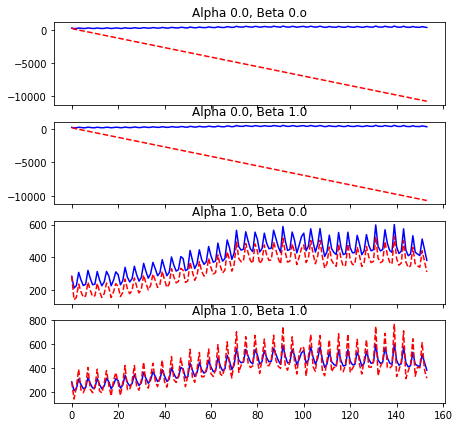

In [5]:
# Let's evaluate the performance on boundary cases of alpha beta, 
# that is, (0,0), (0, 1), (1,0), and (1,1) values of alpha and beta smoothing parameters:
# Effect of alpha and beta
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 1)

# Plot the curves
f, axarr = plt.subplots(4, sharex=True)
f.set_size_inches(7, 7)

beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF00'].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.0, Beta 0.o')

beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['DEF01'].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.0, Beta 1.0')

beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=axarr[2])
beer_df['DEF10'].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 1.0, Beta 0.0')

beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=axarr[3])
beer_df['DEF11'].plot(color='r', linestyle = '--', ax=axarr[3])
axarr[3].set_title('Alpha 1.0, Beta 1.0')

Text(0.5,1,'Double Smoothing Forecast')

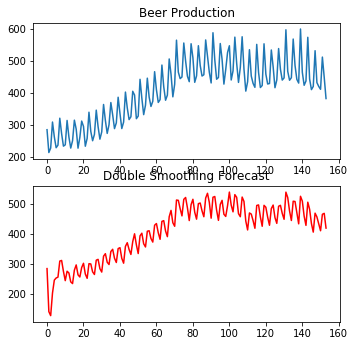

In [6]:
# Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

In [7]:
# Single vs Double Forecast value
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)
beer_df.head(5)

,Quarter,Beer_Prod,DEF,DEF00,DEF01,DEF10,DEF11,Single_Exponential_Forecast
0,1956Q1,284.4,284.400000,284.4,284.4,284.4,284.4,284.40000
1,1956Q2,212.8,141.200000,141.2,141.2,141.2,141.2,255.76000
2,1956Q3,226.9,127.876000,69.6,69.6,155.3,241.0,244.21600
3,1956Q4,308.4,203.028320,-2.0,-2.0,236.8,389.9,269.88960
4,1957Q1,262.0,246.071782,-73.6,-73.6,190.4,215.6,266.73376


Text(0.5,1,'Actual Vs Single Smoothing Forecasting')

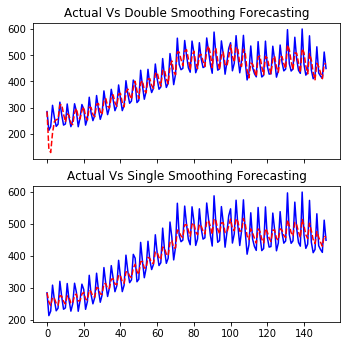

In [8]:
# Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'][:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'][:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

The preceding figure shows that double exponential smoothing is able to capture the variation of the real signal better for the current dataset as compared to single exponential smoothing. However, in scenarios where the trend component tends to zero, the performance of the single and double exponential smoothing approach is comparable.

Text(0.5,1,'Double Smoothing Forecast')

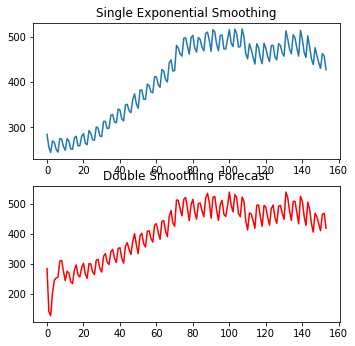

In [9]:
# Plot single and double exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')